Tamaño minimo para reconocer pads aprox 5x5 pixeles

In [ ]:
    img = soldermask + serigraphy
    kernel = np.ones((3, 3), np.uint8)
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    # kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(img, kernel, iterations=2)
    # showImGray(img)
    # showImGray(erosion)

    # se obtienen los componentes conexos
    a, labels, stats, centroids = cv2.connectedComponentsWithStats(erosion)
    areas = []
    # se obtiene areas
    for i in np.arange(a):
        areas.append(stats[i][cv2.CC_STAT_AREA])
    # Se obtiene el area de mayor conectividad
    lab_max = np.argmax(areas[1:-1])
    # Se obtiene region de mayor conectividad
    max_connected = np.array(np.equal(labels, lab_max + 1) * 255, np.uint8)
    kernel = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(max_connected, cv2.MORPH_OPEN, kernel)
    kernel = np.ones((10, 10), np.uint8)
    back = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

NameError: name 'serigraphy' is not defined

# Pruebas para segmentacion

### importaciones generales

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
import os

print "OpenCV Version : %s " % cv2.__version__




OpenCV Version : 3.3.0 


### Funciones generales

In [334]:
def showImGray(image,cutBox=False,write=False):
    if write!=False:
        cv2.imwrite(write+".png", image)
    if (cutBox!=False):
        x1,y1,x2,y2 = cutBox
        image=image[y1:y2,x1:x2]
    plt.imshow(image, cmap='gray')
    plt.show()

def showImBGR(image,cutBox=False,write=False):
    if write!=False:
        cv2.imwrite(write+".png",image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if (cutBox!=False):
        x1,y1,x2,y2 = cutBox
        image=image[y1:y2,x1:x2]
    plt.imshow(image)
    plt.show()
    
def showImHSV(hsv, cutBox=False,write=False):
    if write!=False:
        cv2.imwrite(write+".png",cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR))
    image = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    # showImBGR(image,cutBox)
    if (cutBox != False):
        x1, y1, x2, y2 = cutBox
        image = image[y1:y2, x1:x2]
    plt.imshow(image)
    plt.show()

    
def load_images_from_folder(folder):
    images = []
    k=0
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            k+=1
            #images.append(img)
    return k



print "Funciones generales cargadas"

Funciones generales cargadas


##Carga de nombre de imagen img_nom

In [347]:
import fnmatch
def get_imgs_noms(folder, ext):
    files = []
    for root, dirnames, filenames in os.walk(folder):
        for filename in fnmatch.filter(filenames, '*'+ext):
         files.append(os.path.join(root, filename))
    return files

#Carga de imagen aleatoria
def rand_imnom():
    folder="/Users/Jpcoseco/Pictures/imagenes/cvl_pcb_dslr_1"
    noms=get_imgs_noms(folder, ".jpg")
    img_nom=np.random.choice(noms)
    print "imagen usada", img_nom
    return img_nom

Funciona "/Users/Jpcoseco/Pictures/imagenes/cvl_pcb_dslr_1/pcb15/rec3.jpg"

### Histograma

In [3]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([hsv],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

NameError: name 'hsv' is not defined

# Proposals de componentes
##Carga de imagen y uso de mascara guardada

imagen usada /Users/Jpcoseco/Pictures/imagenes/cvl_pcb_dslr_1/pcb13/rec2.jpg
porte imagen  2023 2442


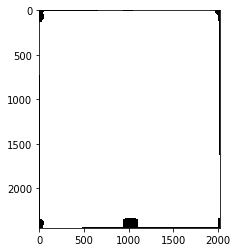

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [350]:
#img_nom="/Users/Jpcoseco/Pictures/imagenes/cvl_pcb_dslr_1/pcb15/rec3.jpg"
import orientation as orient


#Imitacion de get conected
img_nom=rand_imnom()
img = cv2.imread(img_nom)
pcbmask = cv2.imread(img_nom.replace(".jpg", "-mask.png"), 0)
resimg=cv2.imread(img_nom.replace(".jpg","-clustered.png"))
soldermask=cv2.imread(img_nom.replace(".jpg","-soldermask.png"),0)

#showImBGR(img)

img,pcbmask=orient.cut_and_straighten(img, pcbmask)
comp_mask=cv2.bitwise_not(soldermask+cv2.bitwise_not(pcbmask))
showImGray(pcbmask)
print comp_mask

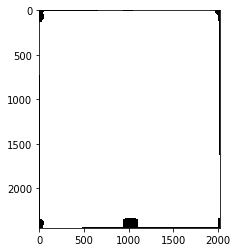

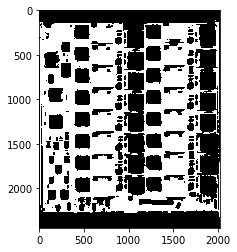

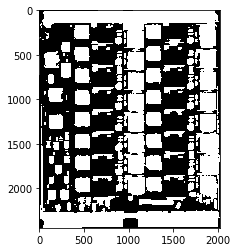

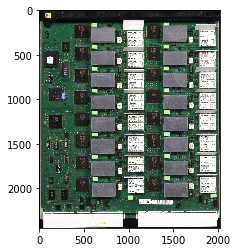

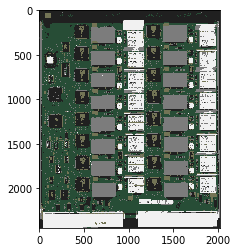

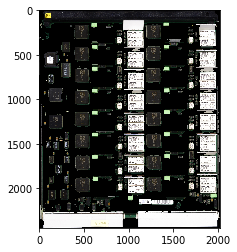

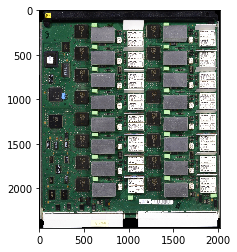

In [349]:
back=cv2.bitwise_and(img,img,mask=soldermask+pcbmask)
comps=cv2.bitwise_and(img,img,mask=comp_mask)
cv2.imwrite("comps.png",comps)
cv2.imwrite("Back.png",back)



showImGray(pcbmask)
showImGray(soldermask)
showImGray(comp_mask)
showImBGR(img)
showImBGR(resimg)
showImBGR(comps)
showImBGR(back)



#contours,hierarchy = cv2.findContours(immask, 1, 2)

# Procesamientos soldermask, carga g3c3

In [266]:
#Funcion para mostrar detalle de imagen
def showDet(img,back,box=False,inv=True):
    if inv==True:
        mask=cv2.bitwise_not(back)
    else:
        mask=back
    bit=cv2.bitwise_and(img,img,mask)
    showImGray(mask,box)
    showImBGR(bit,box)
    print box


In [212]:
box=    [1600,600,2300,900]
color_masks, gray_masks=np.load(img_nom.replace(".jpg", "-colors.npy"))
print "cargado"

cargado


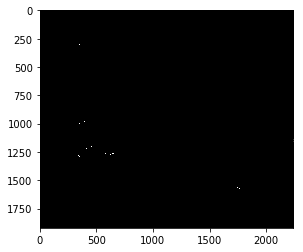

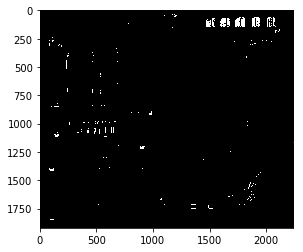

In [267]:
box=    [1600,600,2300,900]
garr = []
for i in np.arange(np.shape(gray_masks)[0]):
    marr=np.ma.array(gray_masks[i], mask=pcbmask)
    garr.append(np.sum(marr))

carr = []
for i in np.arange(np.shape(color_masks)[0]):
    marr=numpy.ma.array(color_masks[i], mask=pcbmask)
    carr.append(np.sum(marr))
    
maxc = np.argmax(carr)
maxg = np.argmax(garr)

a=garr+carr
b=np.append(color_masks,gray_masks,axis=0)

n=np.arange(len(a))
#se ordenan los indices de mayor a menor por la izquierda
Z = [x for _,x in sorted(zip(a,n))][::-1]
soldermask_mask=b[Z[0],:,:]
serigraphy_mask=b[Z[2],:,:]

showImGray(soldermask_mask)
showImGray(serigraphy_mask)


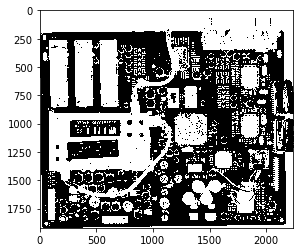

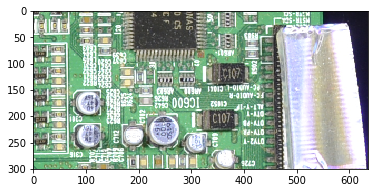

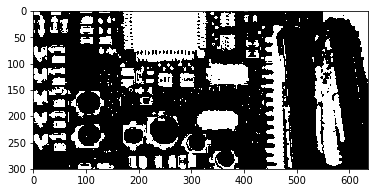

In [237]:
    #Se suman parte del soldermask y la serigrafia
    back= soldermask_mask + serigraphy_mask 
    
    
    
    notback=cv2.bitwise_not(back)
    comps=cv2.bitwise_and(img,img,mask=notback)
    showImGray(cv2.bitwise_not(back))
    showImBGR(comps,box)
    showImGray(cv2.bitwise_not(back),box)
    

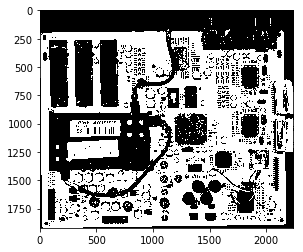

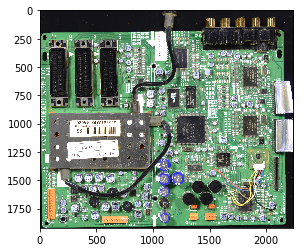

False


In [238]:
    #Se obtiene closure
    kernel = np.ones((3, 3), np.uint8)
    back2 = cv2.morphologyEx(back, cv2.MORPH_CLOSE, kernel)
    showDet(img,back2)

    

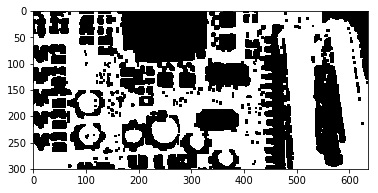

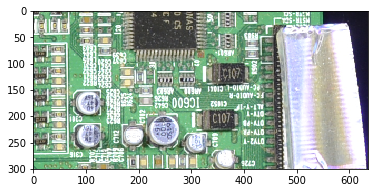

[1600, 600, 2300, 900]


In [239]:
    #se obtiene erosion
    
    # kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(back, kernel, iterations=2)
    
    showDet(img, erosion,box)

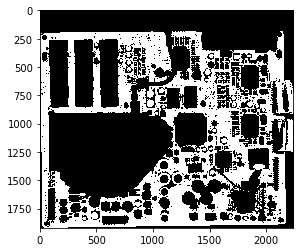

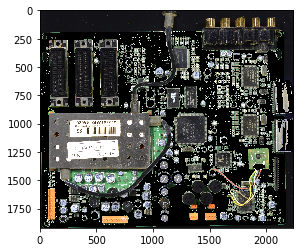

False


In [240]:
    # se obtienen los componentes conexos
    a, labels, stats, centroids = cv2.connectedComponentsWithStats(erosion)
    areas = []
    # se obtiene areas
    for i in np.arange(a):
        areas.append(stats[i][cv2.CC_STAT_AREA])
    # Se obtiene el area de mayor conectividad
    lab_max = np.argmax(areas[1:-1])
    # Se obtiene region de mayor conectividad
    max_connected = np.array(np.equal(labels, lab_max + 1) * 255, np.uint8)
    
    showDet(img, max_connected)

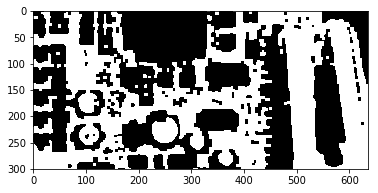

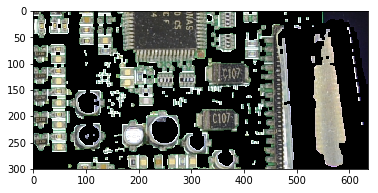

[1600, 600, 2300, 900]


In [241]:
    # Se vuelve a abrir imagen
    kernel = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(max_connected, cv2.MORPH_OPEN, kernel)
    
    showDet(img, opening,box)
    

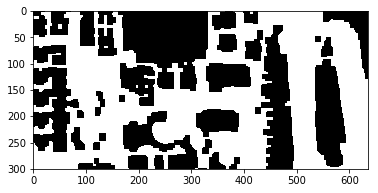

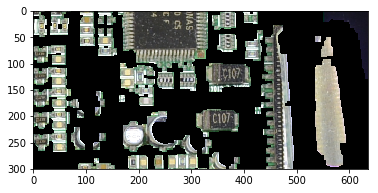

[1600, 600, 2300, 900]


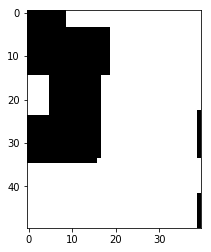

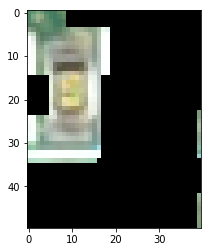

[1650, 610, 1690, 660]


In [242]:
    #Se cierra imagen
    kernel = np.ones((10, 10), np.uint8)
    soldermask = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    
    showDet(img, soldermask,box)
    #showDet(img,soldermask,[box[0]+50,box[1]+10,box[0]+90,box[1]+60]) #Abrir si se quiere ver detalle de pads

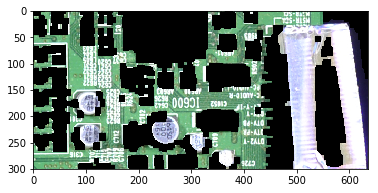

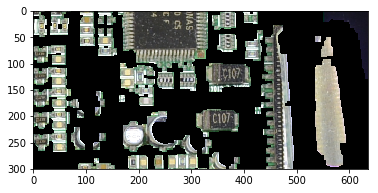

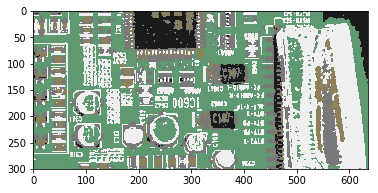

In [244]:
#producto terminado

solder=cv2.bitwise_and(img,img,mask=soldermask)
comps=cv2.bitwise_and(img,img,mask=cv2.bitwise_not(soldermask))
showImBGR(solder,box)
showImBGR(comps,box)
showImBGR(resimg,box)

# Segmentacion con c20g20

[[  0   0  80]
 [  0   0 239]
 [  0   0  24]
 [  0   0 137]
 [  0   0 251]
 [  0   0 165]
 [  0   0  47]
 [  0   0 102]
 [  0   0 115]
 [  0   0 211]
 [  0   0   9]
 [  0   0  17]
 [  0   0  62]
 [  0   0 153]
 [  0   0 193]
 [  0   0  34]
 [  0   0 125]
 [  0   0 225]
 [  0   0 179]
 [  0   0  93]]
[[ 58  78 153]
 [113  47 230]
 [ 20 153  91]
 [ 66  94 176]
 [ 21  63 210]
 [111  82 156]
 [118  63  56]
 [ 67 129 112]
 [ 59 107  69]
 [ 13 154 240]
 [ 72 100 121]
 [171  63  79]
 [ 23  61 142]
 [ 37  85  92]
 [120 180 212]
 [ 20  60  72]
 [ 73  55 172]
 [ 45  69 151]
 [ 66  90 124]
 [ 67 127 168]]


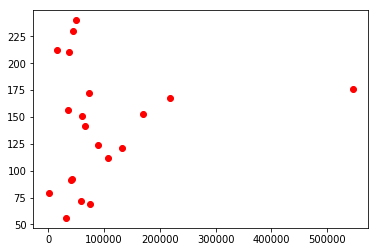

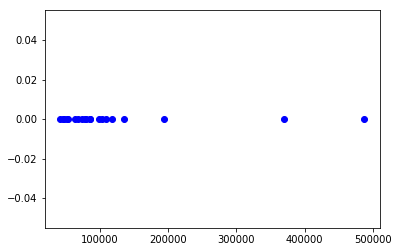

In [324]:
box=    [1600,600,2300,900]
#color_masks, gray_masks=np.load(img_nom.replace(".jpg", "-2020colors.npz"))
loaded= np.load(img_nom.replace(".jpg", "-2020colors.npz"))
gray_masks=loaded['arr_0']
color_masks=loaded['arr_1']
gray_codebook=loaded['arr_2']
color_codebook=loaded['arr_3']

garr = []
for i in np.arange(np.shape(gray_masks)[0]):
    garr.append(np.sum(gray_masks[i]))
print color_codebook
print gray_codebook
    
carr = []
for i in np.arange(np.shape(color_masks)[0]):
    carr.append(np.sum(color_masks[i]))

#Grafico de distribucion de componentes
plt.plot(garr,gray_codebook[:,2],'ro')
plt.figure()
plt.plot(carr,color_codebook[:,0],'bo')

(40, 1920, 2236) (40, 3)
(20, 1920, 2236) (20, 1920, 2236)
<built-in function sum>
[3, 31, 24, 19, 22, 0, 35, 10, 26, 27, 7, 32, 30, 18, 20, 39, 21, 28, 33, 8, 16, 25, 12, 23, 17, 15, 36, 38, 9, 34, 37, 1, 13, 29, 2, 4, 5, 6, 14, 11]


[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[1 1 0 ..., 1 1 1]
 [1 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 1 1]
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 

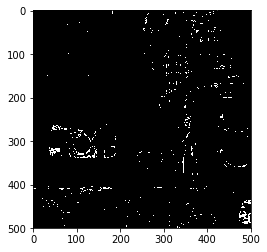

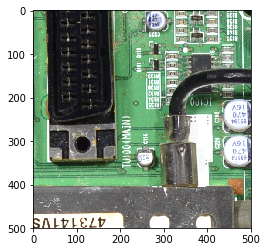

[500, 500, 1000, 1000]


In [328]:
# Se unen las mascaras de color
masks=np.append(gray_masks,color_masks,axis=0)
codebooks=np.append(gray_codebook,color_codebook,axis=0)

sums = []
print np.shape(masks), np.shape(codebooks)
print color_masks.shape, gray_masks.shape

nmasks=np.shape(masks)[0]

# Se obtienen areas
for i in np.arange(nmasks):
    a=np.sum(masks[i,:,:])
    sums.append(a)
print sums



n=np.arange(nmasks)
#se ordenan los indices de mayor a menor por la izquierda
Z = [x for _,x in sorted(zip(sums,n))][::-1]
print Z
print "\n"
#for i in n:
#    print masks[Z[i]]


showDet(img,colors_masks[Z[0],:,:],[500,500,1000,1000],False)

(1920, 2236) (3,)
[ 58  78 153]


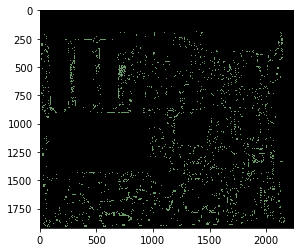

(1920, 2236) (3,)
[113  47 230]


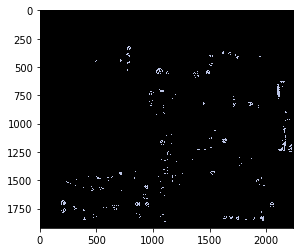

(1920, 2236) (3,)
[ 20 153  91]


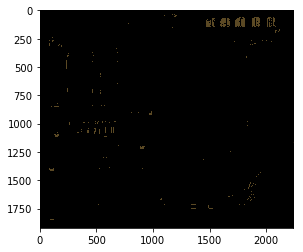

(1920, 2236) (3,)
[ 66  94 176]


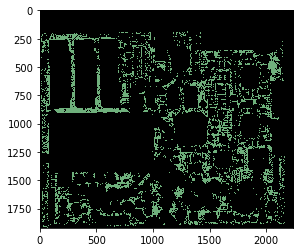

(1920, 2236) (3,)
[ 21  63 210]


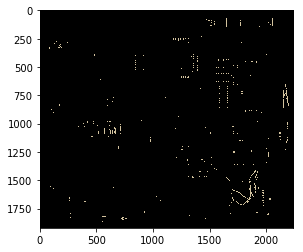

(1920, 2236) (3,)
[111  82 156]


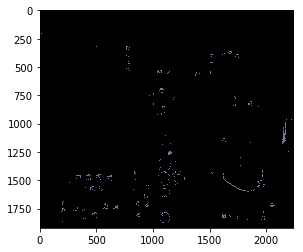

(1920, 2236) (3,)
[118  63  56]


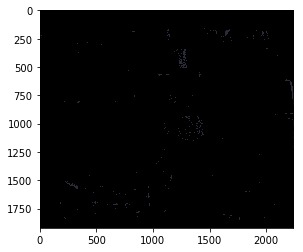

(1920, 2236) (3,)
[ 67 129 112]


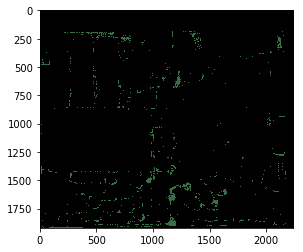

(1920, 2236) (3,)
[ 59 107  69]


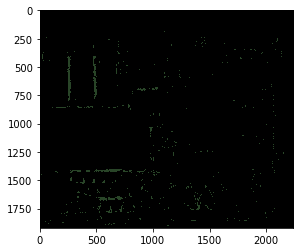

(1920, 2236) (3,)
[ 13 154 240]


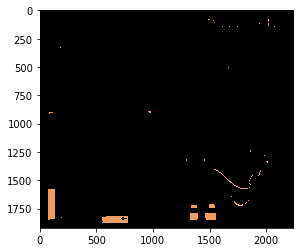

(1920, 2236) (3,)
[ 72 100 121]


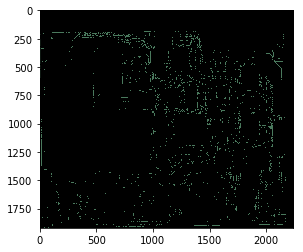

(1920, 2236) (3,)
[171  63  79]


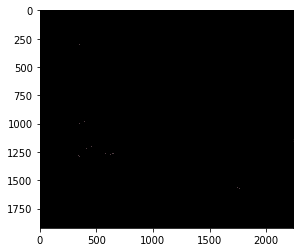

(1920, 2236) (3,)
[ 23  61 142]


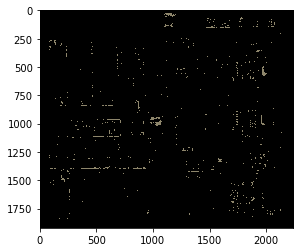

(1920, 2236) (3,)
[37 85 92]


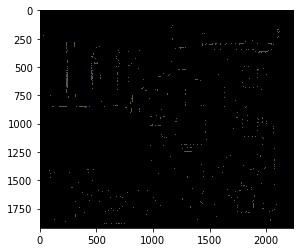

(1920, 2236) (3,)
[120 180 212]


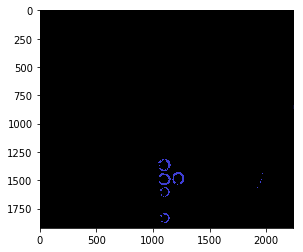

(1920, 2236) (3,)
[20 60 72]


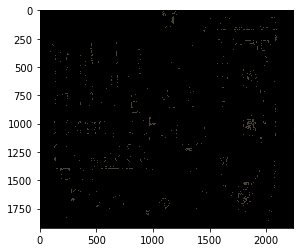

(1920, 2236) (3,)
[ 73  55 172]


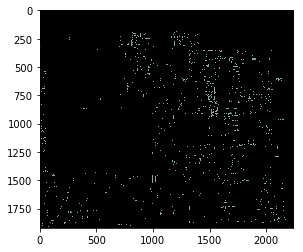

(1920, 2236) (3,)
[ 45  69 151]


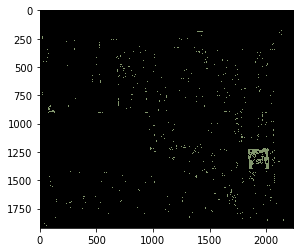

(1920, 2236) (3,)
[ 66  90 124]


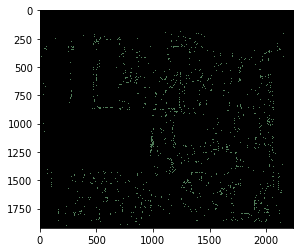

(1920, 2236) (3,)
[ 67 127 168]


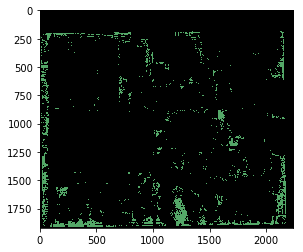

(1920, 2236) (3,)
[ 0  0 80]


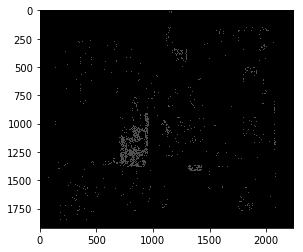

(1920, 2236) (3,)
[  0   0 239]


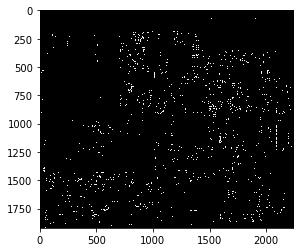

(1920, 2236) (3,)
[ 0  0 24]


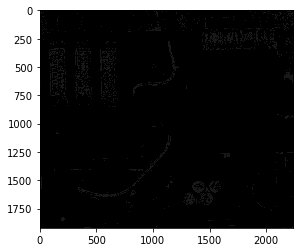

(1920, 2236) (3,)
[  0   0 137]


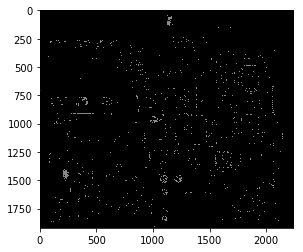

(1920, 2236) (3,)
[  0   0 251]


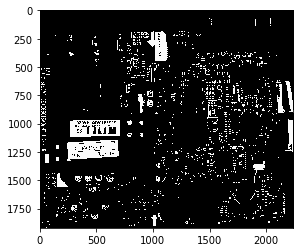

(1920, 2236) (3,)
[  0   0 165]


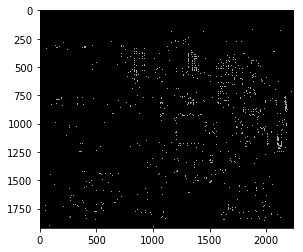

(1920, 2236) (3,)
[ 0  0 47]


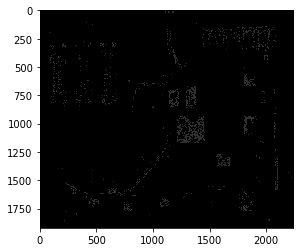

(1920, 2236) (3,)
[  0   0 102]


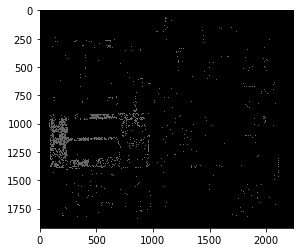

(1920, 2236) (3,)
[  0   0 115]


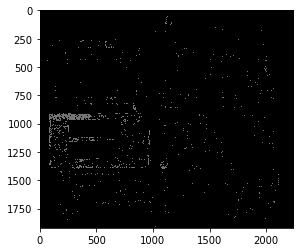

(1920, 2236) (3,)
[  0   0 211]


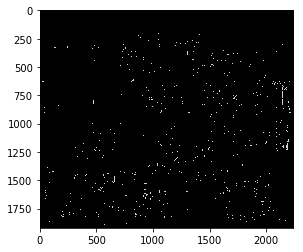

(1920, 2236) (3,)
[0 0 9]


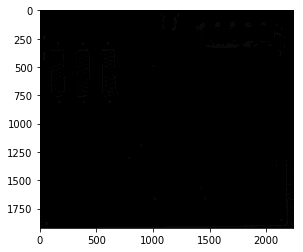

(1920, 2236) (3,)
[ 0  0 17]


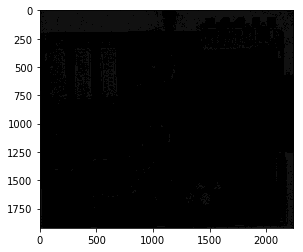

(1920, 2236) (3,)
[ 0  0 62]


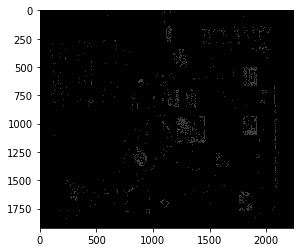

(1920, 2236) (3,)
[  0   0 153]


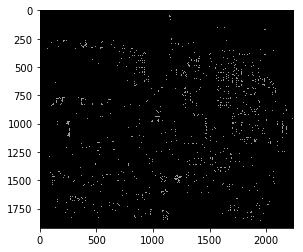

(1920, 2236) (3,)
[  0   0 193]


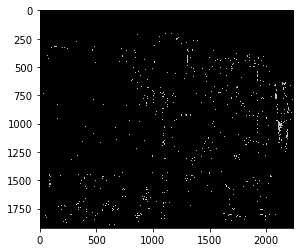

(1920, 2236) (3,)
[ 0  0 34]


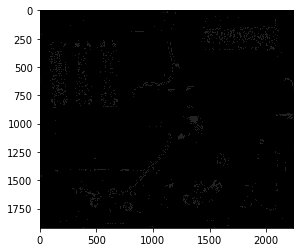

(1920, 2236) (3,)
[  0   0 125]


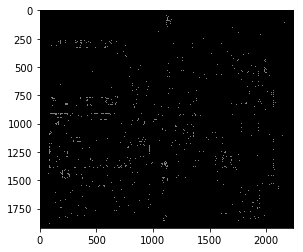

(1920, 2236) (3,)
[  0   0 225]


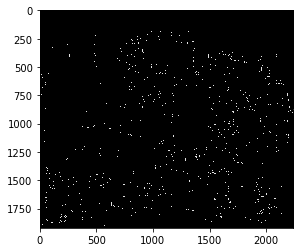

(1920, 2236) (3,)
[  0   0 179]


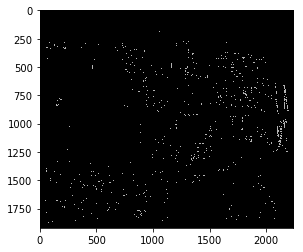

(1920, 2236) (3,)
[ 0  0 93]


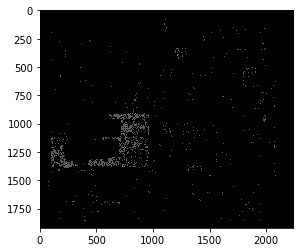

In [ ]:
#funcion para colorear una mascara con un color indicado
def color_mask(inmask, incodebook):
    
    w, h = tuple(inmask.shape)
    d = 3
    image = np.zeros((w, h, d), np.uint8)
    image[:,:,0] = inmask*incodebook[0]
    image[:,:,1] = inmask*incodebook[1]
    image[:,:,2] = inmask*incodebook[2]
    return image
     
d,w, h = tuple(masks.shape)
d = 3

res_image = np.zeros((w, h, d), np.uint8)

for i in n:
    mas=masks[i,:,:]
    color=codebooks[i,:]
    
    print mas.shape, color.shape
    print color, sums[]
    immask=color_mask(mas,color)
    res_image+= immask
    showImHSV(immask)
    
    


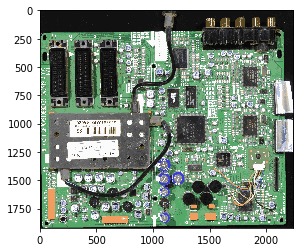

In [335]:
showImHSV(res_image,write="resimage2020")


Implementar IOU
Procesar por cercania dist/IOU/Color
Pensar iteracion grises, comp

[1671159 1366105  691075   97760   76555   71088   26658   18605   17659
   12933   12808    8129    7937    7782    7513    6998    6521    5702
    5649    5397    5227    4873    4653    4446    4114    4077    3533
    3214    3195    3025    2764    2596    2564    2542    2462    2460
    2303    2263    2252    2209    2181    2167    2159    2119    2105
    2041    2036    2034    2001    1988    1953    1925    1899    1891
    1700    1619    1613    1471    1450    1443    1301    1285    1235
    1234    1221    1220    1215    1179    1127    1113    1095    1081
    1059    1032    1002    1000     987     905     899     872     850
     849     754     721     712     697     670     635     622     614
     612     597     588     572     543     519     493     493     488
     483     482     479     477     473     460     455     442     437
     434     433     429     429     428     424     422     419     418
     418     416     416     415     409     405   

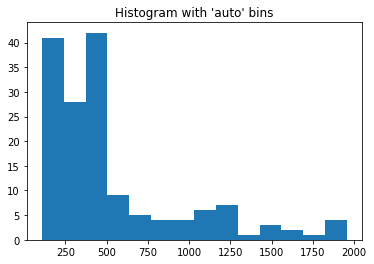

In [224]:
a, labels, stats, centroids = cv2.connectedComponentsWithStats(cv2.bitwise_not(soldermask))
areas = []
# se obtiene areas
for i in np.arange(a):
    areas.append(stats[i][cv2.CC_STAT_AREA])

areas=np.sort(areas)[::-1]
print areas
plt.hist(areas[50:-1], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()